In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [3]:
dataset=pd.read_csv("spam.csv",encoding = "latin")
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
dataset=dataset.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
dataset = dataset.rename(columns = {'v1':'y','v2':'X'})
dataset.groupby('y').describe()

X                                                               
     count unique                                                top freq
y                                                                        
ham   4825   4516                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
dataset['y'] = encoder.fit_transform(dataset['y'])
dataset.head()

,y,X
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
x_copy = dataset['X'].copy() 
y=dataset['y']

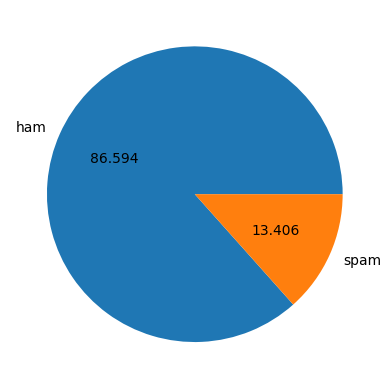

In [7]:
plt.pie(dataset['y'].value_counts(), labels=['ham','spam'],autopct="%0.3f")
plt.show()

In [8]:
import string
def text_preprocess(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    return " ".join(text)

In [9]:
x_copy = x_copy.apply(text_preprocess)


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
msg_vect = vectorizer.fit_transform(x_copy)
print(" after vectorizer")
print(msg_vect[0])

 after vectorizer
  (0, 8871)	0.19696340342726038
  (0, 1168)	0.3454453072521403
  (0, 3821)	0.16228382867264401
  (0, 2198)	0.2918335915067389
  (0, 1862)	0.3297648855969494
  (0, 4809)	0.2918335915067389
  (0, 9107)	0.23822187576133733
  (0, 3861)	0.19227005405586492
  (0, 1864)	0.2918335915067389
  (0, 1401)	0.2626832171423389
  (0, 2482)	0.26752361109476797
  (0, 6381)	0.2701917502132373
  (0, 4652)	0.3454453072521403
  (0, 3764)	0.15705625796538664


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(msg_vect, y, test_size=0.3, random_state=20)


In [12]:
print("x_train", X_train[:5])
print("y_train" ,y_train[:5])

x_train   (0, 8938)	0.38390752553068686
  (0, 4051)	0.38390752553068686
  (0, 3122)	0.2672880653818529
  (0, 3624)	0.29420398711192614
  (0, 8827)	0.284983697343027
  (0, 5560)	0.31455334019386855
  (0, 4632)	0.3609090451930311
  (0, 3901)	0.25635010015080717
  (0, 2622)	0.19713700659748826
  (0, 5531)	0.23839040775858125
  (0, 7996)	0.27460502097424444
  (1, 321)	0.26494347155899756
  (1, 764)	0.26494347155899756
  (1, 8802)	0.26494347155899756
  (1, 618)	0.26494347155899756
  (1, 879)	0.26494347155899756
  (1, 5039)	0.26494347155899756
  (1, 2175)	0.26494347155899756
  (1, 2248)	0.252917181834926
  (1, 5048)	0.2277859206047139
  (1, 4868)	0.21437982488795423
  (1, 6734)	0.2238253154062689
  (1, 1752)	0.17921365788176138
  (1, 6358)	0.18179445708751832
  (1, 2104)	0.16830676440049086
  :	:
  (3, 1239)	0.29774380259876354
  (3, 2335)	0.29774380259876354
  (3, 1745)	0.29774380259876354
  (3, 4101)	0.29774380259876354
  (3, 1093)	0.29774380259876354
  (3, 3691)	0.29774380259876354
  (3, 

In [13]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(solver='liblinear', penalty='l1')
logistic.fit(X_train, y_train)
log_pred = logistic.predict(X_test)
log_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [14]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
acc1=accuracy_score(y_test,log_pred)
acc1

0.9383971291866029

In [15]:

def stemmer (text):
    text = text.split()
    words = " "
    for i in text:
        stemmer = SnowballStemmer("english")
        words += (stemmer.stem(i))+" "
    return words

In [16]:
x_copy = x_copy.apply(stemmer)
vectorizer = TfidfVectorizer()
x_vect = vectorizer.fit_transform(x_copy)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(x_vect,y, test_size=0.3, random_state=20)
log2 = LogisticRegression()
log2.fit(X_train, y_train)
log2_pred = log2.predict(X_test)
log2_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
acc2=accuracy_score(y_test,log2_pred)
acc2


0.94377990430622

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
rfc_acc=accuracy_score(y_test,rfc_pred)
print("Accuracy 1:", rfc_acc)

Accuracy 1: 0.9665071770334929


In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

print(accuracy_score(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))
print(precision_score(y_test,rfc_pred))

0.9665071770334929
[[1436    3]
 [  53  180]]
0.9836065573770492


In [21]:
# inp=["Please call our customer service representative on 0800 169 6031 between 10am-9pm as you have WON a guaranteed å£1000 cash or å£5000 prize"]
def is_spam(inp):
    print(inp)
    inp=pd.Series(inp)
    print("series",inp)
    inp =inp.apply(stemmer)
    print("stemmer",inp)
    inp_prep=inp.apply(text_preprocess)
    print("prepppp",inp_prep)

    inp_test=vectorizer.transform(inp_prep)
    print("inp_test",inp_test)
    inp_pred=mnb.predict(inp_test)
    print("op",inp_pred)

    if inp_pred==1:
        print("spam")
        return True
    else:
        print("Not Spam")

        return False


# model.predict(vectorizer.transform(inp)[0])



In [22]:
X_train, X_test, y_train, y_test = train_test_split(x_vect, y, test_size=0.3, random_state=20)


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)


clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [24]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9736842105263158
Precision -  0.9796954314720813
For  KN
Accuracy -  0.8917464114832536
Precision -  1.0
For  NB
Accuracy -  0.9551435406698564
Precision -  1.0
For  DT
Accuracy -  0.9336124401913876
Precision -  0.8588235294117647
For  LR
Accuracy -  0.9461722488038278
Precision -  0.9132947976878613
For  RF
Accuracy -  0.9659090909090909
Precision -  0.9731182795698925
For  AdaBoost
Accuracy -  0.9611244019138756
Precision -  0.92
For  BgC
Accuracy -  0.9605263157894737
Precision -  0.8883720930232558
For  ETC
Accuracy -  0.9712918660287081
Precision -  0.9946524064171123
For  GBDT
Accuracy -  0.9473684210526315
Precision -  0.9142857142857143
For  xgb
Accuracy -  0.9671052631578947
Precision -  0.9278846153846154


In [26]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.973684,0.979695
8,ETC,0.971292,0.994652
10,xgb,0.967105,0.927885
5,RF,0.965909,0.973118
6,AdaBoost,0.961124,0.920000
7,BgC,0.960526,0.888372
2,NB,0.955144,1.000000
9,GBDT,0.947368,0.914286
4,LR,0.946172,0.913295
3,DT,0.933612,0.858824


In [29]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.973684
1,ETC,Accuracy,0.971292
2,xgb,Accuracy,0.967105
3,RF,Accuracy,0.965909
4,AdaBoost,Accuracy,0.961124
5,BgC,Accuracy,0.960526
6,NB,Accuracy,0.955144
7,GBDT,Accuracy,0.947368
8,LR,Accuracy,0.946172
9,DT,Accuracy,0.933612


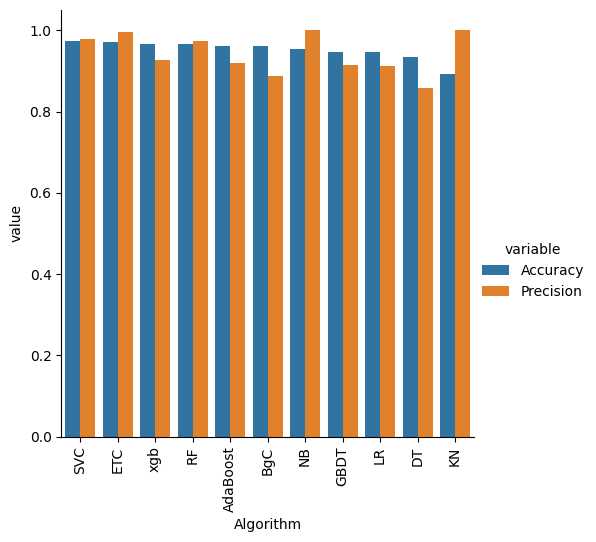

In [30]:
sns.catplot(x = 'Algorithm', y='value', hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.xticks(rotation='vertical')
plt.show()

In [31]:
import pickle
pickle.dump(svc,open('svc.pkl','wb'))
pickle.dump(vectorizer,open('vector1.pkl','wb'))




In [32]:
modelv = pickle.load(open('vector1.pkl','rb'))
modelv.transform(x_copy)

<5572x8037 sparse matrix of type '<class 'numpy.float64'>'
	with 46982 stored elements in Compressed Sparse Row format>

In [33]:
# inp=["Please call our customer service representative on 0800 169 6031 between 10am-9pm as you have WON a guaranteed å£1000 cash or å£5000 prize"]
def is_spam(inp):
    print(inp)
    inp=pd.Series(inp)
    print("series",inp)
    inp =inp.apply(stemmer)
    print("stemmer",inp)
    inp_prep=inp.apply(text_preprocess)
    print("prepppp",inp_prep)

    inp_test=modelv.transform(inp_prep)
    print("inp_test",inp_test)
    inp_pred=svc.predict(inp_test)
    print("op",inp_pred)

    if inp_pred==1:
        print("spam")
        return True
    else:
        print("Not Spam")

        return False


# model.predict(vectorizer.transform(inp)[0])



In [34]:
inp1 = "Please call our customer service representative on 0800 169 6031 between 10am-9pm as you have prize!"  
is_spam(inp1)

Please call our customer service representative on 0800 169 6031 between 10am-9pm as you have prize!
series 0    Please call our customer service representativ...
dtype: object
stemmer 0     pleas call our custom servic repres on 0800 1...
dtype: object
prepppp 0    pleas call custom servic repres 0800 169 6031 ...
dtype: object
inp_test   (0, 6213)	0.252732145241991
  (0, 5930)	0.34584174505085746
  (0, 5668)	0.24688966929815848
  (0, 5498)	0.22694177228671156
  (0, 2280)	0.26233401106139614
  (0, 1781)	0.15513474909956798
  (0, 718)	0.40801096635306855
  (0, 392)	0.40801096635306855
  (0, 307)	0.40801096635306855
  (0, 48)	0.3343024133863381
op [1]
spam


True